# Prosper Loan Data Exploration


## 1. Introduction

This document explores a dataset of 84672  rows and 23 columns of loan data. It is worthy to note that this is a subset of the original dataset which contains 113937 entries, 81 columns.


# What is the structure of your dataset?

There are 84,672 Prosper information in the dataset and 23 features 

See data dictionary [here]('https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing')

Variables are either strings, numerical, or categorical as cleaned above.

# What is/are the main feature(s) of interest in your dataset?
My main feature of interest is the loan original amount, the ratings and score and other personal(Borrower's information) that affect the amount .

    Main Feature of interest: LoanOriginalAmount in the dataset.

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that StatedMonthlyIncome will have the strongest effect on the Loan Original Amount: the higher the income, the higher the Loan Original Amount. I also think that Loan Term and Prosper risk score will have an effect on the Loan Original Amount.

I expect that being a home owner will have a positive effect on Loan Original Amount.

The percent of the loan that will be funded.
The stated monthly income
The personal details of the borrower( do they have their home?, are they employed, income range )

### Activities

- Import necessary packages for the exploration

- load the dataset and store in a dataframe

- Transform some columns by changing its data type for exploration.

- Build functions to reduce repetition of codes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
# load the dataset into a DataFrame
prosper = pd.read_csv('LoanDataset.csv')

In [4]:
# make a copy for analysis.
df = prosper.copy()

In [46]:
# Convert some columns to required data types
ordinal_var_dict = {'ProsperRating': ['HR','E','D','C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'IncomeRange' : [ '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+'],
                    'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September','October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)

prosper.ListingCategory = prosper.ListingCategory.astype('category')
prosper.Term = prosper.Term.astype(str)
prosper.IsBorrowerHomeowner = prosper.IsBorrowerHomeowner.astype('category')
prosper.EmploymentStatus = prosper.EmploymentStatus.astype('category')
prosper.LoanMonthsSinceOrigination = prosper.LoanMonthsSinceOrigination.astype(str)

In [65]:
# writing a function that will be used to specify plot title, xlabels and ylabels across all plots

def plot_attributes(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y);
    
pal = ["#FAAE7B", '#432371']

## 2. Univariate Exploration


> 1. What loan term has the highest count?

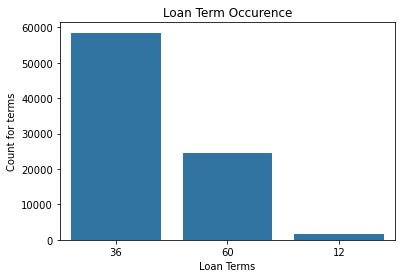

In [11]:
sb.countplot(data=prosper, x='Term', color=base_color)
plot_attributes('Loan Term Occurence', 'Loan Terms', 'Count for terms');

Most borrowers take the loan for a period of 36 months as shown above.

> 2. How did prosper rate their borrowers from HR(High Risk) to AA(Excellence)?

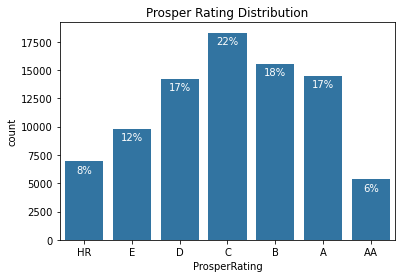

In [55]:
# Prosper Rating Distribution

sb.countplot(data=prosper,x='ProsperRating',color=base_color);
plt.title('Prosper Rating Distribution')
# Returns the sum of all not-null values
n_prosper = prosper.shape[0]
# Count the frequency of unique values in the `ProsperRating` column 
type_counts = prosper['ProsperRating'].value_counts()
# add annotations
i, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for i, label in zip(i, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_prosper)

    # print the annotation just below the top of the bar
    plt.text(i,  count-1000, pct_string, ha = 'center', color = 'w');

From the above chat going from the lowest(HR) to AA(considered the best), we see taht 22% of the borrowers were merely rated average(C).
There's an even distribution of the borrowers on both sides from low to high.

> 3. How is the Original loan amount distributed? what range has a higher occurrence?

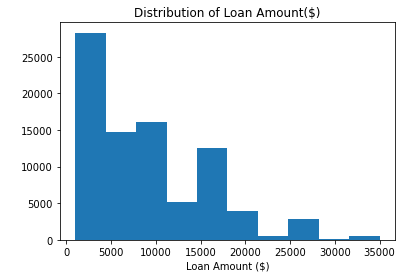

In [25]:
#plot distribution of loan amount
plt.hist(data = prosper, x = 'LoanOriginalAmount')
# using the defined function
plot_attributes('Distribution of Loan Amount($)', 'Loan Amount ($)', ' ' )

Clearly we see that most borrowers got loan amount between 0-10,000($)

Further investigating to see the distribution using smaller bin size and transformation.

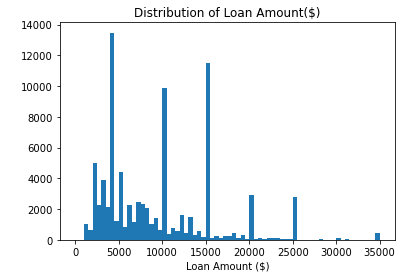

In [26]:
# investigating further on an even smaller bin size
binsize = 500
bins = np.arange(0, prosper['LoanOriginalAmount'].max()+binsize, binsize);
plt.hist(data = prosper, x = 'LoanOriginalAmount', bins = bins);

plot_attributes('Distribution of Loan Amount($)', 'Loan Amount ($)', ' ' )


Now we see that the major peaks are around 4,000, 10,000 and 15,000  which represent mostly occuring loan amounts.

> 4. Who are Prosper's clients? what are their income range?


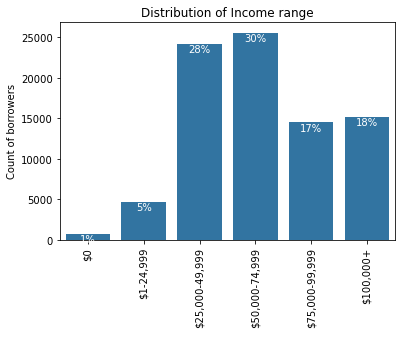

In [54]:
# Income range Distribution
ax = sb.countplot(data=prosper, x='IncomeRange', color=base_color );
plot_attributes('Distribution of Income range', ' ', 'Count of borrowers' )
# Returns the sum of all not-null values
n_prosper = prosper.shape[0]
# Count the frequency of unique values in the `IncomeRange` column 
type_counts = prosper['IncomeRange'].value_counts()

# add annotations
i, labels = plt.xticks(rotation = 90) # get the current tick locations and labels

# loop through each pair of locations and labels
for i, label in zip(i, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_prosper)

    # print the annotation just below the top of the bar
    plt.text(i,  count-1000, pct_string, ha = 'center', color = 'w');

Most of the borrowers fall within the income range of `$25,000`  and `$75,000`

> 5. How many of Prosper's borrowers are home owners?

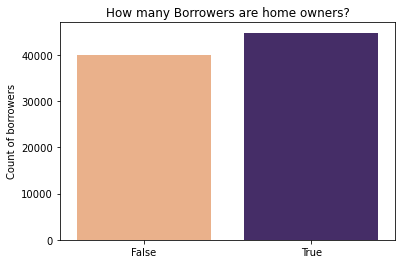

In [67]:
# Count of borrowers who own homes

sb.countplot(data=prosper,x='IsBorrowerHomeowner',palette=pal);
plot_attributes('How many Borrowers are home owners?', '', 'Count of borrowers' )

There's not so much variance in this, i'll further explore the impact of owning a home on the borrower by seeing the relationship between this and other features.

## 3. Bivariate Exploration



> 6. How does being a homeowner, affect a borrower's rating?

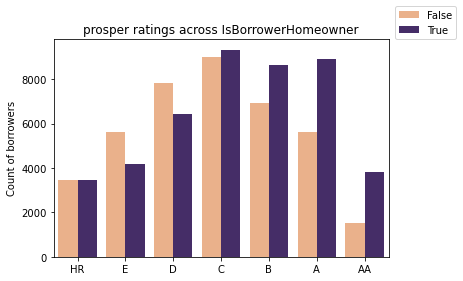

In [66]:
sb.countplot(data = prosper, x = 'ProsperRating', hue = 'IsBorrowerHomeowner', palette=pal );
plt.legend(loc=(1.02,1))
plot_attributes('prosper ratings across IsBorrowerHomeowner', '', 'Count of borrowers' )

Ofcourse, borrowers who own their homes got higher ratings than those who didn't.

> 7. How does owning a home relate to income range?

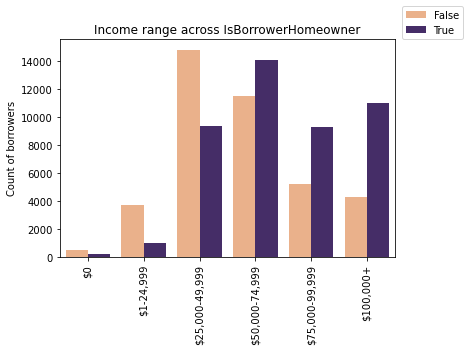

In [68]:
sb.countplot(data = prosper, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette=pal)
plt.xticks(rotation = 90)
plt.legend(loc=(1.02,1))
plot_attributes('Income range across IsBorrowerHomeowner', '', 'Count of borrowers' )

Those who own thier homes were seen to be those whose range were a bit higher as compared to those who weren't home owners.

> 8. What is the relationship between APR and rate of a borrower?

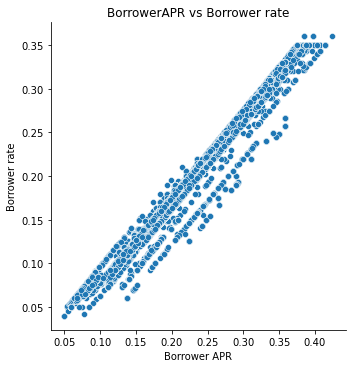

In [70]:
sb.relplot(x= 'BorrowerAPR', y= 'BorrowerRate', data=df, kind="scatter");
plot_attributes('BorrowerAPR vs Borrower rate' , 'Borrower APR', 'Borrower rate' )
          

A very strong correlation between the rate and APR of the borrower.

> 9. Explore how loan amounts have increased over the years

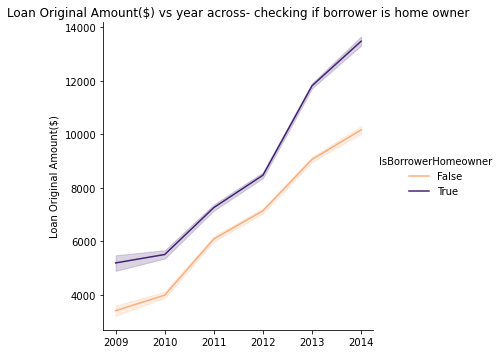

In [75]:
sb.relplot(x= 'LoanOriginationYear', y= 'LoanOriginalAmount', 
            data=df, kind="line", hue="IsBorrowerHomeowner", palette=pal
            )
plot_attributes('Loan Original Amount($) vs year across- checking if borrower is home owner', '', 'Loan Original Amount($)' )            

From the above illustration, we see an upward slope from 2009 - 2014 but we also see that home owners are ahead of the game as seen earlier in the ratings.

> 10. Explore the relationship between Monthly income and loan amount

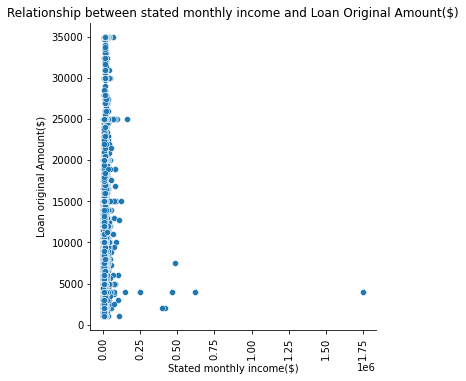

In [80]:
sb.relplot(x= 'StatedMonthlyIncome', y= 'LoanOriginalAmount', 
            data=df,
            kind="scatter")
plt.xticks(rotation = 90)
plot_attributes('Relationship between stated monthly income and Loan Original Amount($)', 
                'Stated monthly income($)', 'Loan original Amount($)' )

There's actually no relationship between both variables.

> 11. Distribution of Borrowers across borrowing month and if they own their homes.

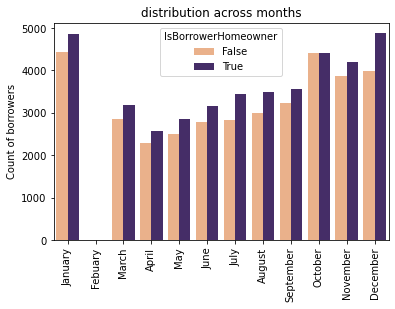

In [81]:
sb.countplot(data = prosper, x = 'LoanOriginationMonth', hue="IsBorrowerHomeowner", palette=pal)
plot_attributes('distribution across months', '', 'Count of borrowers' )
plt.xticks(rotation = 90);

Both home owners and non home owners are evenly distributed across all months. with Homeowners mostly leading, in october there's a tie as  the need for loan was even among the two categories.
Also, demand for loan seems to be higher towards the end of the year.

> 12. Explore the relationship between monthly loan payment and loan amount

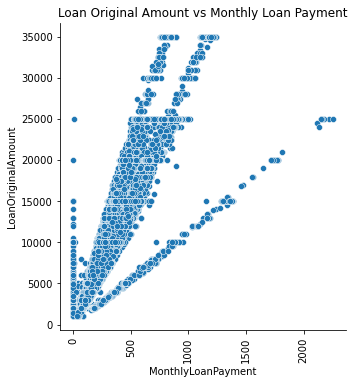

In [92]:

sb.relplot(x= 'MonthlyLoanPayment', y= 'LoanOriginalAmount', 
            data=df,
            kind="scatter", 
            )
plt.title('Loan Original Amount vs Monthly Loan Payment')            
plt.xticks(rotation = 90);       

A rarely positive relationship exists between both features.

> 13. Explore prosper score vs Loan Original Amount across Terms

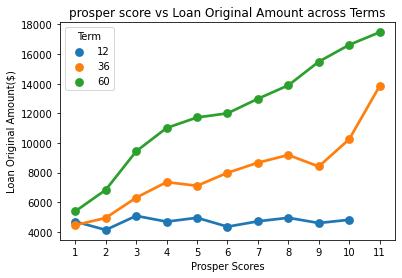

In [86]:
sb.pointplot(x= 'ProsperScore', y= 'LoanOriginalAmount', hue = 'Term',
            data=df,
            ci = None
            );
plot_attributes('prosper score vs Loan Original Amount across Terms', 'Prosper Scores', 'Loan Original Amount($)' )          

The higher the term, the higher the amount and eventually the rating. However, we see how the 12 month term never went over 4000.

> 14. What impact does owning a home and having a high score have on the loan amount?

## 4. Multivariate Exploration


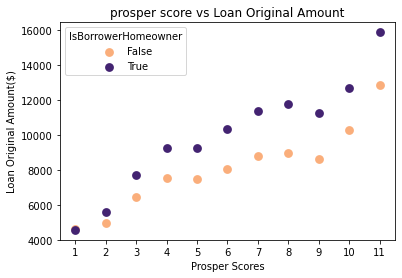

In [91]:
sb.pointplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner', ci=None, palette = pal, linestyles = '')
plot_attributes('prosper score vs Loan Original Amount', 'Prosper Scores', 'Loan Original Amount($)' )   

The plot above shows that home-owners who have a higher score, tend to get higher loan amounts.

> 15. Explore genrally the relationship between variables.

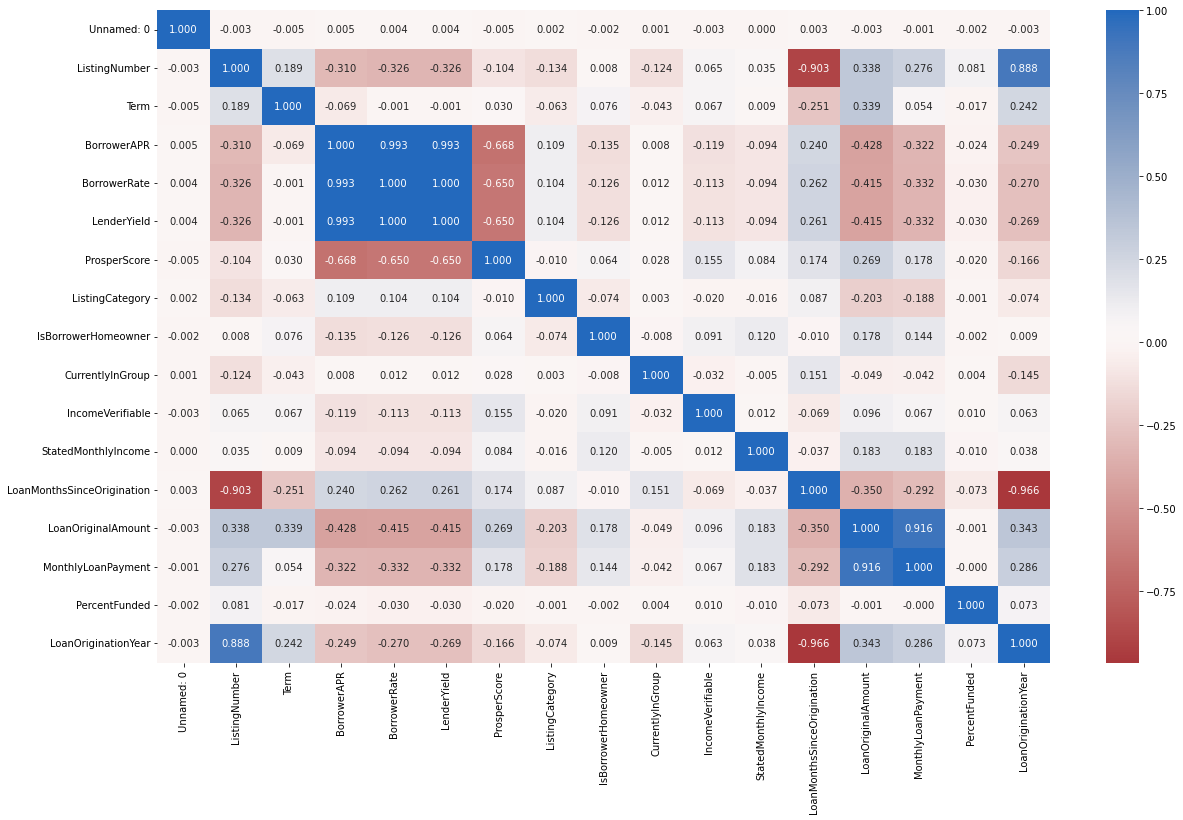

In [88]:
#correlation matrix
cor = df.corr()

#plotting the heat map
plt.figure(figsize = (20,12))
sb.heatmap(cor,annot=True, cmap = 'vlag_r', fmt = '.3f');


we see clearly, the strong positive relationship(dark blue square) between Borrower APR, Borrower rate and Lender yield with a slightly positive relationship with prosper score.

Next, The relationship strong positive correlation between Loan Amoount and Monthly loan payment.

## 5. Conclusions


Roadmap to Data Exploration

1. I imported the needed packages and the data set.Then, I performed some preliminary assessment and cleaning in data wrangling phase and chose my features of interests.
2. I created a subset of the original dataframe.
3. Plotted univariate ccharts on loan term, prosper rating, home owners, income range, loan original amount.
4. Plotted Bivariate charts to explore the impact of borrower's having their homes on the rating, score, loan amount and also the relationship between APR and Rate, monthly payment and loan amount and, loan for homeowers vs non home owners over the years of consideration.
5. Plotted Multivariate charts to understand relationships better and see how certain combination of features relate to each other.

## 6. Summary of Findings


Insights from exploring this dataset shows the following.


1. The most effective loan term is `36` most persons want loans for a duration of 36 months. maybe because it isnt too early or too late its the avaerage for paying back.

2. The peak times with the highest loan amounts are the beginning(January) and end(December) of the year while the lowest is around April and July and also there was no loan for the month of febrauary.

3. Home owners with a large monthly income tend to get the highest amounts and also gwt a good prosper score.

